In [1]:
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras import utils, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split, StratifiedKFold
#from keras.preprocessing.image import load_img, img_to_array
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib as plt

In [2]:
CLASS_TEXT_TO_NUM = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'J': 10,
    'K': 11,
    'L': 12,
    'M': 13,
    'N': 14,
    'O': 15,
    'P': 16,
    'Q': 17,
    'R': 18,
    'S': 19,
    'T': 20,
    'U': 21,
    'V': 22,
    'W': 23,
    'X': 24,
    'Y': 25,
    'Z': 26,
    'nothing': 27,
    'space': 28,
    'del': 29
}


In [2]:
train_directory = "../dataset/archive/asl_alphabet_train/asl_alphabet_train"

In [3]:
classes = 29
batch_size = 256
epochs = 10
lnr = 0.0001

In [3]:
gen = ImageDataGenerator(rescale=1./255, validation_split=0.1) 
train = gen.flow_from_directory(
    "../dataset/archive/asl_alphabet_train/asl_alphabet_train", 
    target_size=(64, 64),
    subset="training"
)
val = gen.flow_from_directory(
    "../dataset/archive/asl_alphabet_train/asl_alphabet_train", 
    target_size=(64, 64),
    subset="validation"
)

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [7]:
train.next()[1][0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
def build_model(desired_model='vgg_16'):
    adam = Adam(learning_rate=lnr)
    model = Sequential()

    if desired_model == 'vgg_16':
        model.add(VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3)))
    if desired_model == 'vgg_19':
        model.add(VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(29, activation='softmax'))

    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'] )
    
    return model

In [8]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "./checkpoints/CS231-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size
)

In [9]:
earlystopping = callbacks.EarlyStopping(
    monitor="val_loss",
    mode="min", 
    patience=5,
    restore_best_weights = True
)

In [17]:
# Create a new model instance
model = build_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

In [18]:
keras_call_back = [earlystopping, cp_callback]

history = model.fit(
    train,
    validation_data = val,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=1, 
    callbacks = keras_call_back
)

Epoch 1/10
1280/2447 [==============>...............] - ETA: 28:57 - loss: 0.1984 - accuracy: 0.9396
Epoch 00001: saving model to ./checkpoints/CS231-0001.ckpt
2447/2447 [==============================] - 3717s 2s/step - loss: 0.1207 - accuracy: 0.9635 - val_loss: 0.0978 - val_accuracy: 0.9706
Epoch 2/10
 113/2447 [>.............................] - ETA: 56:35 - loss: 0.0458 - accuracy: 0.9873
Epoch 00002: saving model to ./checkpoints/CS231-0002.ckpt
1393/2447 [================>.............] - ETA: 25:40 - loss: 0.0243 - accuracy: 0.9931
Epoch 00002: saving model to ./checkpoints/CS231-0002.ckpt
2447/2447 [==============================] - 3675s 2s/step - loss: 0.0242 - accuracy: 0.9934 - val_loss: 0.0937 - val_accuracy: 0.9723
Epoch 3/10
 226/2447 [=>............................] - ETA: 54:03 - loss: 0.0072 - accuracy: 0.9983
Epoch 00003: saving model to ./checkpoints/CS231-0003.ckpt
1506/2447 [=================>............] - ETA: 22:56 - loss: 0.0147 - accuracy: 0.9964
Epoch 00003

In [2]:
test = ImageDataGenerator(rescale=1./255).flow_from_directory("../dataset/archive/asl_alphabet_test", 
                                                            target_size=(64, 64), class_mode=None)
# pred = model.predict(test)
# pred = np.argmax(pred, axis=1)
# pred

Found 28 images belonging to 1 classes.


In [32]:
print(sorted(pred))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28]


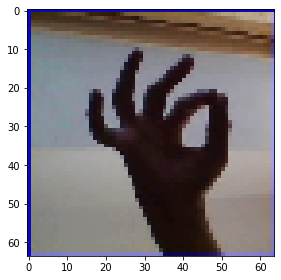

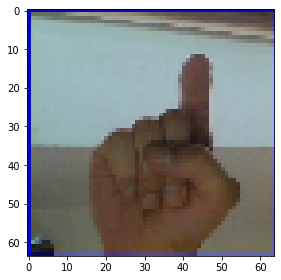

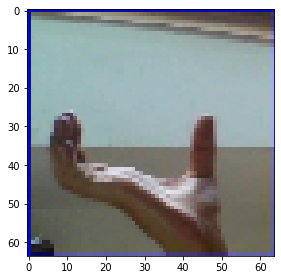

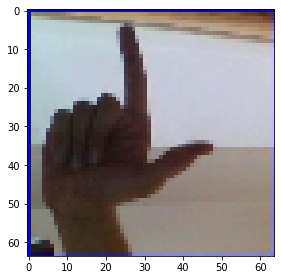

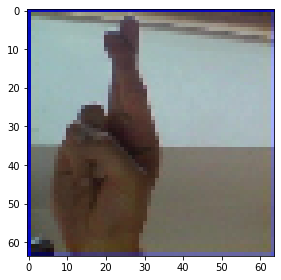

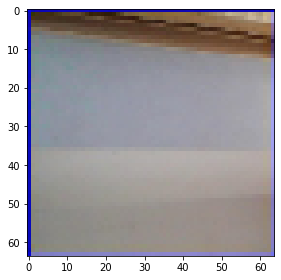

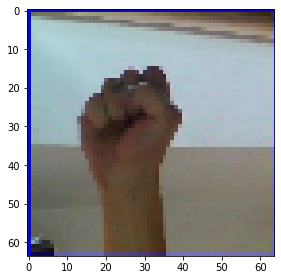

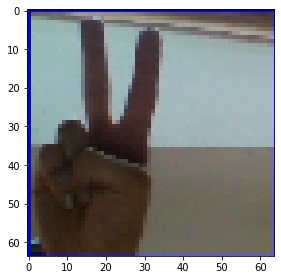

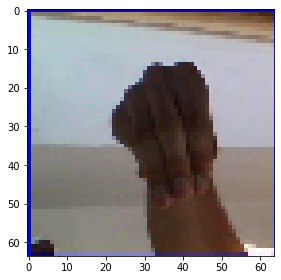

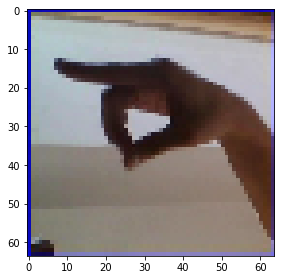

In [34]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

x = test.next()

for i in range(0,11):
    image = x[i]
    imshow(image)

In [42]:
test.next()[0]

array([[[0.        , 0.        , 0.90196085],
        [0.03529412, 0.02352941, 0.7176471 ],
        [0.02352941, 0.03529412, 0.7137255 ],
        ...,
        [0.04313726, 0.03137255, 0.7176471 ],
        [0.04705883, 0.03529412, 0.7372549 ],
        [0.05490196, 0.02745098, 0.8117648 ]],

       [[0.03529412, 0.01960784, 0.7294118 ],
        [0.36078432, 0.4039216 , 0.28627452],
        [0.33333334, 0.3803922 , 0.29411766],
        ...,
        [0.19607845, 0.13333334, 0.        ],
        [0.1764706 , 0.1137255 , 0.11764707],
        [0.13725491, 0.10588236, 0.32941177]],

       [[0.        , 0.04313726, 0.7372549 ],
        [0.47058827, 0.5803922 , 0.48235297],
        [0.454902  , 0.56078434, 0.5411765 ],
        ...,
        [0.29411766, 0.18431373, 0.16862746],
        [0.2509804 , 0.18039216, 0.14117648],
        [0.1764706 , 0.14117648, 0.38823533]],

       ...,

       [[0.02352941, 0.02352941, 0.79215693],
        [0.16078432, 0.16470589, 0.09411766],
        [0.1254902 , 0